## Bangbang and adaptation

Here, we want to reach a target which is not the target we first see at time $t=0s$. Thus, there is a second target when the first one disappears. Several trajectories are possible.  
A naive approach consists in reaching the first target with a bangbang and then in reaching the second one with another bangbang. But, after many trials, we could predict that the trajectory will be a single bangbang that enables to reach the second target directly.  
So, it will be useful to use a "naivety" parameter that enables to show different shapes of trajectory.  

We assume:  
$\newcommand{\intervalle}[2]{\left[#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervallefo}[2]{\left[#1\mathclose{}\mathpunct{};#2\right[}
\newcommand{\intervalleof}[2]{\left]#1\mathclose{}\mathpunct{};#2\right]}
\newcommand{\intervalleoo}[2]{\left]#1\mathclose{}\mathpunct{};#2\right[}$  
$$
u(t) = \mathbb 1_{\intervalle{0}{\rho\cdot T_1}} \cdot U_1 - \mathbb 1_{\intervalleof{\rho\cdot T_1}{T_1}} \cdot U_1 + \mathbb 1_{\intervalle{T_1}{r\cdot T_2}} \cdot U_2 - \mathbb 1_{\intervalleof{r\cdot T_2}{T_2}} \cdot U_2 + \mathbb 1_{\intervalleoo{T_2}{+\infty}} \cdot U_\infty
$$

We will solve the following differential equation, which represents a linear model of the eye, on the previous intervals:  
  
$$
\dfrac{d\dot{x}(t)}{dt} = -\frac{\beta}{m}\cdot\dot{x}(t)+\frac{1}{m}\cdot u(t)
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
b = 100
m = 1
xT1 = 20
xT2 = 18
dt = 0.001
t_T1 = .05
t_T2 = .06
t_R = .05
T1 = int(t_T1/dt)
T2 = int(t_T2/dt)
R = int(t_R/dt)
time = np.linspace(0, 0.1, R+T1+1)
time_ms = time/dt

In [3]:
rho = -m/(b*T1*dt)*np.log(2/(1+np.exp(b*T1*dt/m)))
rhoT = int(np.round(T1*rho))
r = m/(b*T2*dt)*np.log((np.exp(b*T1*dt/m)+np.exp(b*T2*dt/m))/2)
rT = int(np.round(T2*r))

In [4]:
rho2 = -m/(b*T1*dt)*np.log(2/(1+np.exp(b*T1*dt/m)))
rhoT2 = int(np.round(T1*rho2))
r2 = m/(b*T2*dt)*np.log((np.exp(b*T1*dt/m)+np.exp(b*T2*dt/m))/2)
rT2 = int(np.round(T2*r2))

In [5]:
U1 = b*xT1/((2*rho-1)*T1*dt-m/b*(2-np.exp(-rho*b*T1*dt/m)-np.exp((1-rho)*b*T1*dt/m)))
U2 = b*(xT2-xT1)/((2*r-1)*T2*dt-T1*dt)

In [6]:
x_adapt = np.concatenate((U1/b*(time[0:(rhoT+1)]-m/b*(1-np.exp(-b/m*time[0:(rhoT+1)]))),xT1+U1/b*(T1*dt-time[(rhoT+1):(T1+1)]+m/b*(1-np.exp(b/m*(T1*dt-time[(rhoT+1):(T1+1)])))),xT1+U2/b*(time[(T1+1):(rT+1)]-T1*dt-m/b*(1-np.exp(-b/m*(time[(T1+1):(rT+1)]-T1*dt)))),xT2+U2/b*(T2*dt-time[(rT+1):(T2+1)]+m/b*(1-np.exp(b/m*(T2*dt-time[(rT+1):(T2+1)])))),xT2*np.ones(R+T1-T2)))
v_adapt = np.concatenate((U1/b*(1-np.exp(-b/m*time[0:(rhoT+1)])),-U1/b*(1-np.exp(b/m*(T1*dt-time[(rhoT+1):(T1+1)]))),U2/b*(1-np.exp(-b/m*(time[(T1+1):(rT+1)]-T1*dt))),-U2/b*(1-np.exp(b/m*(T2*dt-time[(rT+1):(T2+1)]))),np.zeros(R+T1-T2)))
u_adapt = np.concatenate((U1*np.ones(rhoT+1),-U1*np.ones(T1-rhoT),U2*np.ones(rT-T1),-U2*np.ones(T2-rT),np.zeros(R+T1-T2)))

In [7]:
rho_notnaive = -m/(b*T2*dt)*np.log(2/(1+np.exp(b*T2*dt/m)))
rhoT_notnaive = int(np.round(T2*rho_notnaive))
U_notnaive = b*xT2/((2*rho_notnaive-1)*T2*dt-m/b*(2-np.exp(-rho_notnaive*b*T2*dt/m)-np.exp((1-rho_notnaive)*b*T2*dt/m)))

In [8]:
x_notnaive = np.concatenate((U_notnaive/b*(time[0:(rhoT_notnaive+1)]-m/b*(1-np.exp(-b/m*time[0:(rhoT_notnaive+1)]))),xT2+U_notnaive/b*(T2*dt-time[(rhoT_notnaive+1):(T2+1)]+m/b*(1-np.exp(b/m*(T2*dt-time[(rhoT_notnaive+1):(T2+1)])))),xT2*np.ones(R+T1-T2)))
v_notnaive = np.concatenate((U_notnaive/b*(1-np.exp(-b/m*time[0:(rhoT_notnaive+1)])),-U_notnaive/b*(1-np.exp(b/m*(T2*dt-time[(rhoT_notnaive+1):(T2+1)]))),np.zeros(R+T1-T2)))
u_notnaive = np.concatenate((U_notnaive*np.ones(rhoT_notnaive+1),-U_notnaive*np.ones(T2-rhoT_notnaive),np.zeros(R+T1-T2)))

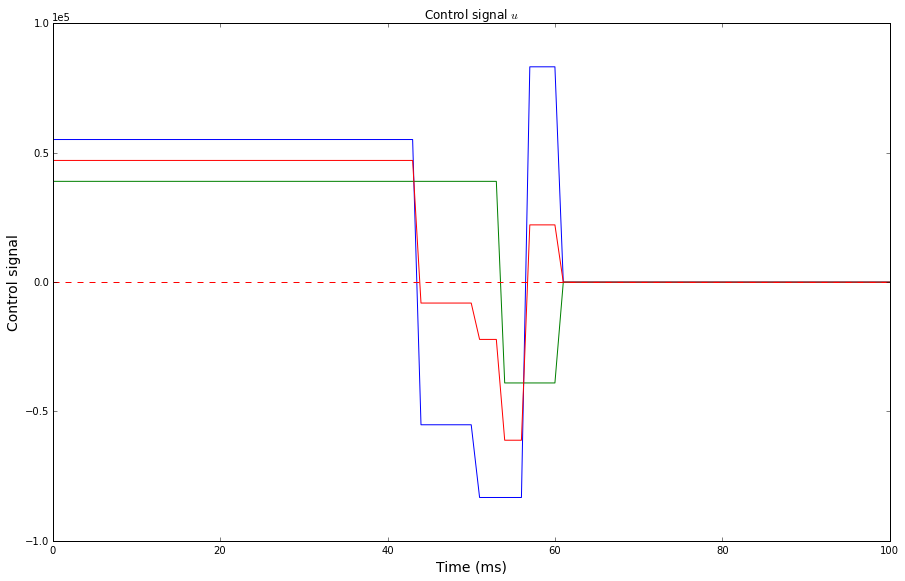

In [13]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, u_adapt, '-')
ax.plot(time_ms, u_notnaive, '-')
ax.plot([0,100],[0,0], 'r--')
ax.set_title(r'Control signal $u$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Control signal', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))
#ax.set_xlim(0, 150)


(-0.5, 20.5)

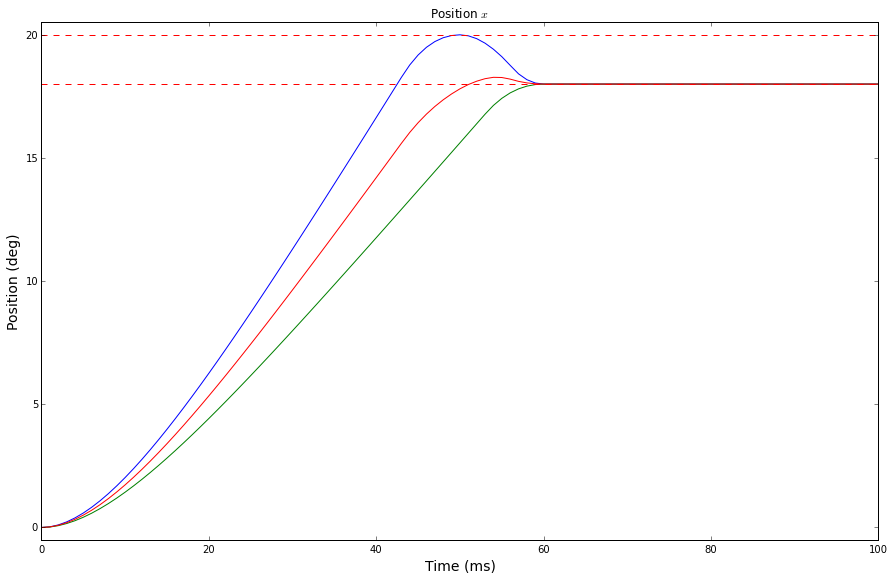

In [12]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, x_adapt, '-')
ax.plot(time_ms, x_notnaive, '-')
ax.plot([0,100],[xT1,xT1], 'r--')
ax.plot([0,100],[xT2,xT2], 'r--')

ax.set_title(r'Position $x$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Position (deg)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(-0.5, max(xT1,xT2)+0.5)


(-390.63186606818283, 558.91748732233111)

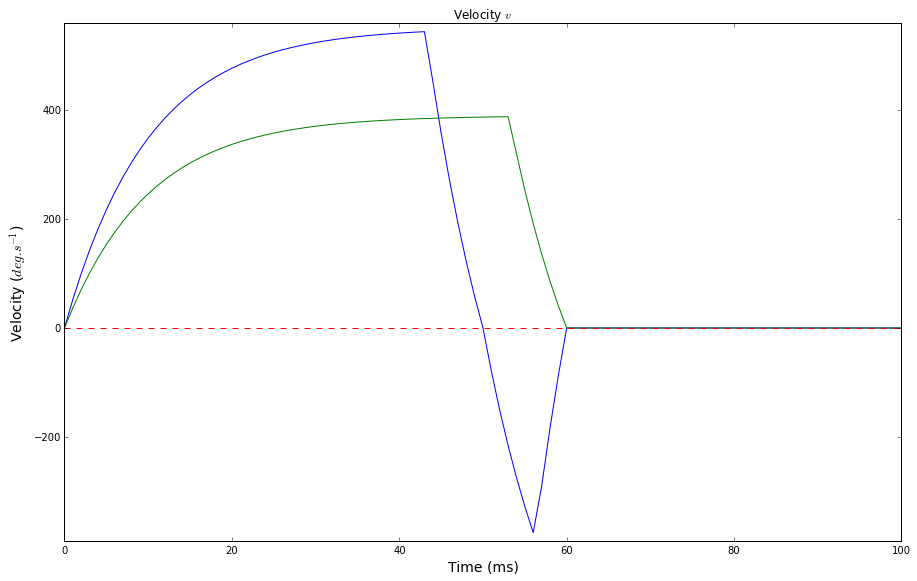

In [15]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))

ax.plot(time_ms, v_adapt, '-')
ax.plot(time_ms, v_notnaive, '-')
ax.plot([0,100],[0,0], 'r--')

ax.set_title(r'Velocity $v$')
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel(r'Velocity ($deg.s^{-1}$)', fontsize=14)
ax.ticklabel_format(axis='y', style='scientific', scilimits=(-3, 3))

ax.set_ylim(min(v_adapt)-15, max(v_adapt)+15)